In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as ss
from scipy import stats
import plotly.express as px
from scipy.stats import mannwhitneyu
import scipy
from tqdm import tqdm

%matplotlib inline

In [8]:
#  файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе 
# (А – контроль, B – целевая группа) 
groups_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Проект_2_groups.csv', sep=';')
# файл с информацией об оплатах пользователей в дни проведения эксперимента. 
checks_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Проект_2_checks.csv', sep=';')
# файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
activ_studs_df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Проект_2_active_studs.csv')
# дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Проект_2_group_add.csv')

In [9]:
checks_df = checks_df.rename(columns={'student_id' : 'id'})
activ_studs_df = activ_studs_df.rename(columns={'student_id' : 'id'})

In [20]:
# Функция объединяющая датасеты.
def compound_df():
    groups_add_df = groups_add
    df = pd.concat([groups_df, groups_add_df], ignore_index=True)
    compouns_df = df.merge(checks_df, how='left', on='id')
    active_student = compouns_df.merge(activ_studs_df, how='inner', on='id')
    return active_student

In [21]:
def cr_and_arpau(active_student):
    group_A = active_student.query('grp == "A"')
    group_B = active_student.query('grp == "B"')
    
    group_a_pay = active_student.query('rev != 0 and grp == "A"')
    group_b_pay = active_student.query('rev != 0 and grp == "B"')
    
    cr_grp_A = ((group_a_pay.rev.count() / group_A.id.count()).round(3))*100
    cr_grp_B = ((group_b_pay.rev.count() / group_B.id.count()).round(3))*100
    
    arpau_a = (group_A.rev.sum() / group_A.id.count()).round(2)
    arpau_b = (group_B.rev.sum() / group_B.id.count()).round(2)
    
    return print(f'''
    ARPAU в группе A = {arpau_a}
    ARPAU в группе B = {arpau_b}
    CR в группе A = {cr_grp_A}
    CR в группе B = {cr_grp_B}
    ''')

cr_and_arpau(active_student)


    ARPAU в группе A = 47.35
    ARPAU в группе B = 58.06
    CR в группе A = 5.1
    CR в группе B = 4.6
    


In [22]:
def metric_charts(active_student):
    group_A = active_student.query('grp == "A"')
    group_B = active_student.query('grp == "B"')
    
    group_a_pay = active_student.query('rev != 0 and grp == "A"')
    group_b_pay = active_student.query('rev != 0 and grp == "B"')
    
    cr_grp_A = ((group_a_pay.rev.count() / group_A.id.count()).round(3))*100
    cr_grp_B = ((group_b_pay.rev.count() / group_B.id.count()).round(3))*100
    
    arpau_a = (group_A.rev.sum() / group_A.id.count()).round(2)
    arpau_b = (group_B.rev.sum() / group_B.id.count()).round(2)
    
    df_metric = pd.DataFrame({'Metric':['arpau_a', 'arpau_b', 'cr_grp_A', 'cr_grp_B'], 'Value':[arpau_a, arpau_b, cr_grp_A, cr_grp_B]})
    g = sns.barplot(data=df_metric, x='Metric', y='Value', ci=False, palette='viridis_r')
    return g


    ARPAU в группе A = 47.35
    ARPAU в группе B = 58.06
    CR в группе A = 5.1
    CR в группе B = 4.6
    


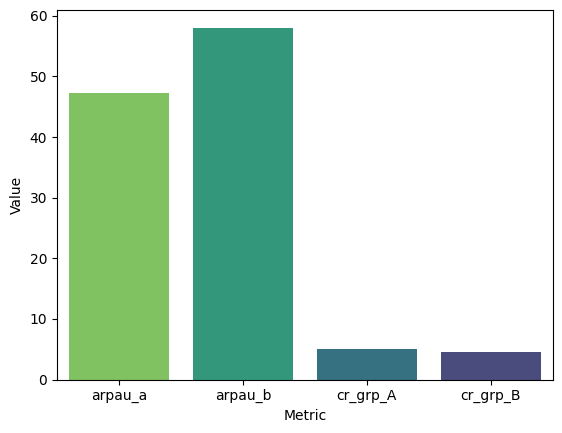

In [23]:
cr_and_arpau(active_student)
metric_charts(active_student)